# Malaria Detection using CNN

## 1. Import Libraries

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten, Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator

## 2. Read and Split the dataset directories

In [2]:
# Make the test and train set files in the cell_images directory

import os

import numpy as np

import shutil

rootdir= r'C:\Users\anann\OneDrive\Desktop\College\AI_SmartBridge\Malaria_prediction\cell_images' #path of the original folder

classes = ['Parasitized', 'Uninfected']

for i in classes:
    os.makedirs(rootdir +'/train/' + i)
    os.makedirs(rootdir +'/test/' + i)
    source = rootdir + '/' + i
    allFileNames = os.listdir(source)
    np.random.shuffle(allFileNames)
    test_ratio = 0.20
    train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                      [int(len(allFileNames)* (1 - test_ratio))])
    train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
    test_FileNames = [source+'/' + name for name in test_FileNames.tolist()]

    for name in train_FileNames:
      shutil.copy(name, rootdir +'/train/' + i)

    for name in test_FileNames:
      shutil.copy(name, rootdir +'/test/' + i)

## 3. Image Preprocessing

In [3]:
train_datagen =ImageDataGenerator (rescale = 1./255, shear_range = 0.2, zoom_range = 0.1, rotation_range=10, 
                              horizontal_flip = True, width_shift_range=0.1, height_shift_range=0.1)

test_datagen = ImageDataGenerator(rescale = 1./255)

## 4. Load Test and Train Dataset

In [4]:
# Train Dataset
x_train = train_datagen.flow_from_directory(r'C:\Users\anann\OneDrive\Desktop\College\AI_SmartBridge\Malaria_prediction\cell_images\train',
                                            target_size = (64, 64), class_mode = 'categorical',
                                            batch_size = 64, shuffle=True)

# Test Dataset
x_test = test_datagen.flow_from_directory(r'C:\Users\anann\OneDrive\Desktop\College\AI_SmartBridge\Malaria_prediction\cell_images\test',
                                            target_size = (64, 64), class_mode = 'categorical',
                                            batch_size = 64, shuffle=True)

Found 22046 images belonging to 2 classes.
Found 5512 images belonging to 2 classes.


In [5]:
# TO check the indices/classes in the dataset
x_train.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [6]:
# To check the labels in train dataset
x_train.labels

array([0, 0, 0, ..., 1, 1, 1])

## 5. Visualization

In [7]:
#assign parasitezed images to infected and uninfected images to uninfected
import os
infected = os.listdir('./cell_images/train/Parasitized')
uninfected = os.listdir('./cell_images/test/Uninfected')

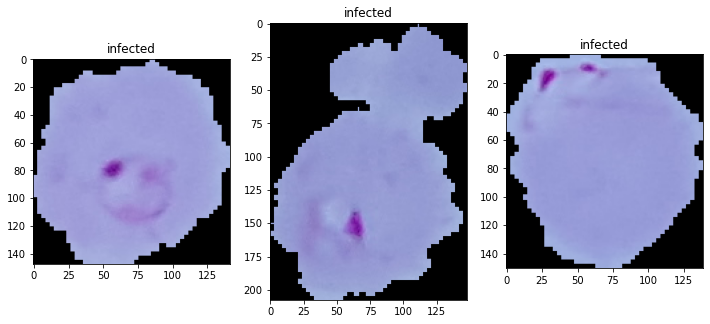

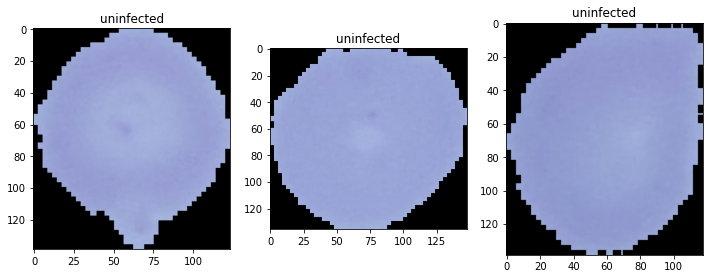

In [8]:
# Plot the image graph

import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,12))
for i in range(3):
    plt.subplot(1,3,i+1)
    img = cv2.imread('./cell_images/Parasitized/' +infected[i])
    plt.imshow(img)
    plt.title('infected')
plt.figure(figsize=(12,12))
for i in range(3):
    plt.subplot(1,3,i+1)
    img2 = cv2.imread('./cell_images/Uninfected/'+uninfected[i])
    plt.imshow(img2)
    plt.title('uninfected')

## 6. Initialize the model

In [9]:
malaria_model = Sequential()

## 7. Adding Convolution and Pooling Layers

In [10]:
# Convolution layer + Max Pooling layer 1
malaria_model.add(Convolution2D(32, (3,3), padding='same', activation='relu', input_shape = (64, 64, 3)))
malaria_model.add(Convolution2D(32, (3,3), padding='same', activation='relu', input_shape = (64, 64, 3)))
malaria_model.add(MaxPooling2D(2,2))

In [11]:
# Convolution layer + Max Pooling layer 2
malaria_model.add(Convolution2D(64, (3,3), padding='same', activation='relu', input_shape = (64, 64, 3)))
malaria_model.add(Convolution2D(64, (3,3), padding='same', activation='relu', input_shape = (64, 64, 3)))
malaria_model.add(MaxPooling2D(2,2))

## 8. Add Flatten/Input Layer


In [12]:
malaria_model.add(Flatten())

## 9. Add Hidden Layers

In [13]:
# Dense Layer + Dropout layer 1
malaria_model.add(Dense(units = 128, kernel_initializer = "random_uniform", activation ="relu"))
malaria_model.add(Dropout(0.25))

# Dense Layer + Dropout layer 2
malaria_model.add(Dense(units = 128, kernel_initializer = "random_uniform", activation ="relu"))
malaria_model.add(Dropout(0.3))

# Dense Layer + Dropout layer 3
malaria_model.add(Dense(units = 128, kernel_initializer = "random_uniform", activation ="relu"))
malaria_model.add(Dropout(0.4)) 

## 10. Add Ouput Layer

In [14]:
# Use the softmax function for the output layer (categorical classification for 2 output sets)
malaria_model.add(Dense(units = 2, kernel_initializer = "random_uniform", activation ="softmax"))

In [15]:
# CHECK THE MODEL SUMMARY
malaria_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0

## 11. Compile the model

In [16]:
# Using Batch Gradient Descent
malaria_model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

### Add Early stopping to avoid underfitting or overfitting the model

In [17]:
# Early Stopping
# Objective is to minimize the validation loss with a patience of 5
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

## 12. Train the model

> steps per epoch is the number of images the model is trained on -> **number of images in train set / batch size** = 22047/64

> validation steps is the no of images the model tests upon -> no of **images in test set / batch size** = 5511/64

In [18]:
hist = malaria_model.fit_generator(x_train,steps_per_epoch = 344 , epochs = 30 , validation_data = x_test, validation_steps = 86, callbacks=[early_stop])

C:\Users\anann\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
344/344 [==============================] - 227s 659ms/step - loss: 0.6705 - accuracy: 0.5530 - val_loss: 1.2431 - val_accuracy: 0.9233
Epoch 2/30
344/344 [==============================] - 224s 650ms/step - loss: 0.2276 - accuracy: 0.9326 - val_loss: 0.1677 - val_accuracy: 0.9486
Epoch 3/30
344/344 [==============================] - 229s 666ms/step - loss: 0.1687 - accuracy: 0.9514 - val_loss: 0.1453 - val_accuracy: 0.9571
Epoch 4/30
344/344 [==============================] - 231s 672ms/step - loss: 0.1534 - accuracy: 0.9546 - val_loss: 0.1364 - val_accuracy: 0.9582
Epoch 5/30
344/344 [==============================] - 176s 511ms/step - loss: 0.1533 - accuracy: 0.9539 - val_loss: 0.1460 - val_accuracy: 0.9568
Epoch 6/30
344/344 [==============================] - 199s 579ms/step - loss: 0.1440 - accuracy: 0.9566 - val_loss: 0.1387 - val_accuracy: 0.9549
Epoch 7/30
344/344 [==============================] - 198s 576ms/step - loss: 0.1444 - accuracy: 0.9560 - val_loss: 0.1285 -

## 13. Comparing accuracies

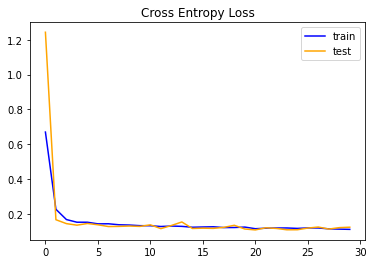

In [19]:
# Plotting the accuracies
import matplotlib.pyplot as plt

# plot training and testing loss

plt.title('Cross Entropy Loss')
plt.plot(hist.history['loss'], color='blue', label='train')
plt.plot(hist.history['val_loss'], color='orange', label='test')
plt.legend()

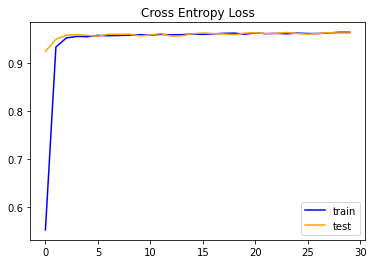

In [20]:
# plot training and testing accuracy
plt.title('Cross Entropy Loss')
plt.plot(hist.history['accuracy'], color='blue', label='train')
plt.plot(hist.history['val_accuracy'], color='orange', label='test')
plt.legend()

## 14. Saving the model

In [21]:
malaria_model.save('malaria.h5')

## 15. Testing the model

In [22]:
# Importing Libraries
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
# Loading the model
malaria_model = load_model ("malaria.h5")

> **a. Testing for Uninfected cell image**

In [24]:
# Load the image
img = image.load_img("Uninfected.png", target_size=(64, 64))

In [25]:
# Convert the image to array type
x = image.img_to_array(img)

In [26]:
# Expand the dimension to a 4D type
x = np.expand_dims(x, axis = 0)

In [27]:
x.shape

(1, 64, 64, 3)

In [28]:
# Prediction
index = ['Parasitized', 'Uninfected']
pred = np.argmax(malaria_model.predict(x))
index[pred]

'Uninfected'

***Here we can see that the prediction is correct***

> **b. Testing for Parasitized cell image**

In [29]:
img1 = image.load_img("Parasitized.png", target_size=(64, 64))
y = image.img_to_array(img1)
y = np.expand_dims(y, axis = 0)
pred1 = np.argmax(malaria_model.predict(y))
index[pred1]

'Parasitized'

***Here we can see that the prediction is correct as well***